# Example-01: Square matrix representation

In [1]:
(* In this example, the workflow required to construct a square matrix representation is presented *)
(* Given a Taylor series approximation of a one-turn transformation *)
(* The first step is to perform linear normalization, with the resulting linear part corresponding to a rotation in the linear normalized Floquet frame *)
(* Next, express the transformation using linear complex eigencoordinates *)
(* Finaly, compute truncated expressions for transformed eigenmonomials in terms of the initial ones *)
(* Thus, the square matrix that approximates how eigenmonomial are trasformed can be constructed *)
(* This matrix approximates an infinite eigenmonomial matrix, that represents initial nonlinear system as a linear one with infinite dimensionality *) 

In [8]:
(* Load package functions *)

<< SquareMatrixMethod`

In [10]:
(* Define transformation *)

ClearAll[initial$map];
initial$map[{q_, p_}] := {p, -q + a*p + p^2} ;

In [13]:
(* Define transformations between original coordinates (q, p) and Floquet frame coordinates (Q, P) *)

QP$qp = {
    Q -> (+q - p*(Cos[w] + Sin[w]))/(Sqrt[2]*Sqrt[Sin[w]]), 
    P -> (-q + p*(Cos[w] + Sin[w]))/(Sqrt[2]*Sqrt[Sin[w]])
} ;

qp$QP = {
    q -> ((Q + P)*Cos[w] + (Q - P)*Sin[w])/(Sqrt[2]*Sqrt[Sin[w]]), 
    p -> (Q + P)/(Sqrt[2]*Sqrt[Sin[w]])
} ;

In [16]:
(* Define transformation in Floquet coordinates *)

ClearAll[floquet$map] ;
floquet$map[{Q_, P_}] := Evaluate[Map[Total, Map[FullSimplify, MonomialList[Inverse[D[{q, p} /. qp$QP, {{Q, P}}]] . (initial$map[{q, p}] /. qp$QP) /. a -> 2 Cos[w], {Q, P}]]]] ;

In [19]:
(* Check linear part *)

D[Collect[Normal[Series[floquet$map[t {q, p}], {t, 0, 1}]], {q, p}, Simplify] /. t -> 1, {{q, p}}]

{{Cos[w], Sin[w]}, {-Sin[w], Cos[w]}}

In [21]:
(* Check symplectic condition for the full transformed map *)

S = {{0, 1}, {-1, 0}} ;
M = D[floquet$map[{q, p}], {{q, p}}] ;
S === Simplify[Transpose[M] . S . M]

True

In [25]:
(* Set global parameter for square matrix computation *)

dimension = 2                 ; (* -- phase space dimension *)
degree    = 4                 ; (* -- computation degree *)
epsilon   = 10.0^-15          ; (* -- chop epsilon *)
accuracy  = $MachinePrecision ; (* -- computation accuracy (not used internally) *)

sm$set$global[dimension, degree, epsilon, accuracy] ;

RowBox[{"4"}]
1   0

0   1

2   0

1   1

0   2

3   0

2   1

1   2

0   3

4   0

3   1

2   2

1   3

0   4
RowBox[{"{", RowBox[{"2", ",", "3", ",", "4", ",", "5"}], "}"}]
RowBox[{"{", RowBox[{RowBox[{"{", RowBox[{"1", ",", "2"}], "}"}], ",", 

 
>         RowBox[{"{", RowBox[{"3", ",", "5"}], "}"}], ",", 

 
>         RowBox[{"{", RowBox[{"6", ",", "9"}], "}"}], ",", 

 
>         RowBox[{"{", RowBox[{"10", ",", "14"}], "}"}]}], "}"}]

RowBox[{"14"}]
RowBox[{"{", RowBox[{"x", ",", "y", ",", SuperscriptBox["x", "2"], ",", 

 
>         RowBox[{"x", " ", "y"}], ",", SuperscriptBox["y", "2"], ",", 

 
>         SuperscriptBox["x", "3"], ",", RowBox[{SuperscriptBox["x", "2"], " ", "y"}], 

 
>         ",", RowBox[{"x", " ", SuperscriptBox["y", "2"]}], ",", 

 
>         SuperscriptBox["y", "3"], ",", SuperscriptBox["x", "4"], ",", 

 
>         RowBox[{SuperscriptBox["x", "3"], " ", "y"}], ",", 

 
>         RowBox[{SuperscriptBox["x", "2"], " ", SuperscriptBox["y", "2"]}], ",", 

 
>         RowBox[{"x", " ", SuperscriptBox["y", "3"]}], ",", SuperscriptBox["y", "4"]}],\
 
>    
    "}"}]

RowBox[{"{", RowBox[{RowBox[{"1.`*^-15", " ", "x"}], ",", "0"}], "}"}]
RowBox[{"1.`15.954589770191003"}]
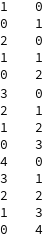

In [31]:
(* The above sets the following global variables and functions *)

sm$degree                        // StandardForm                 (* -- computation degree *)
sm$exponents                     // Map[TableForm] // TableForm  (* -- list of exponents grouped by total monomial degree *)
sm$counts                        // StandardForm                 (* -- number of exponents in each degree *)
sm$intervals                     // StandardForm                 (* -- degree bounding indices *)
sm$size                          // StandardForm                 (* -- total number of monomials *)
sm$monomials[x, y]               // StandardForm                 (* -- (function) returns monomials corresponding to each exponent *)
sm$chop @ (epsilon*{1.0, 0.5}*x) // StandardForm                 (* -- (function) chop *)
sm$accuracy[1]                   // StandardForm                 (* -- (function) accuracy *)

In [40]:
(* Given a mapping in Floquet frame, it can be converted to complex eigencoordinates using the sm$make$map function *)

(* z1 = z  = q - i p *)
(* z2 = z* = q + i p *)

(* Set linear normalization matrix (identity, since the above is already normalized) *)

normalization = {{1, 0}, {0, 1}} ;

(* Convert *)

{{forward, inverse}, mapping} = sm$make$map[normalization, floquet$map] ;

(* forward -- (function) transformation rules from eigencoordinates *)
(* inverse -- (function) transformation rules to eigencoordinated *)
(* mapping -- (function) transformation in eigencoordinates *)

RowBox[{"{", RowBox[{RowBox[{"q", "", 

 
>           RowBox[{FractionBox["p", "2"], "+", FractionBox["q", "2"]}]}], ",", 

 
>         RowBox[{"p", "", RowBox[{RowBox[{"-", 

 
>               FractionBox[RowBox[{"", " ", "p"}], "2"]}], "+", 

 
>             FractionBox[RowBox[{"", " ", "q"}], "2"]}]}]}], "}"}]

RowBox[{"{", RowBox[{RowBox[{"q", "", 

 
>           RowBox[{RowBox[{RowBox[{"-", ""}], " ", "p"}], "+", "q"}]}], ",", 

 
>         RowBox[{"p", "", RowBox[{RowBox[{"", " ", "p"}], "+", "q"}]}]}], "}"}]
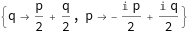

In [50]:
(* Both forward and inverse transformation rules are returned as funtions *)
(* Note, rules have identical symbols on each side *)

forward[q, p] // StandardForm
inverse[q, p] // StandardForm

In [54]:
(* Explore connection between representations *)

(* Given the initial coordinates in Floquet frame, compute the final coordinates *)

StandardForm@Block[
    {x = {0.50, 0.25}, w = 2*Pi*0.12345},
    floquet$map[x]
] 

StandardForm@Block[
    {x = {0.50, 0.25}, w = 2*Pi*0.12345, za, zb},
    (* Transform to eigencoordinates *)
    x = {za, zb} /. inverse[za, zb] /. Thread[{za, zb} -> x] ;
    (* Transform to final eigencoordinates *)
    x = mapping @@ x ;
    (* Transform to final coordinates in Floquet frame *)
    {za, zb} /. forward[za, zb] /. Thread[{za, zb} -> x] // sm$chop
]

(* Given the initial coordinates in complex eigencoordinates, compute the final coordinates *)

StandardForm@Block[
    {x = {0.50 - I*0.25, 0.5 + I*0.25}, w = 2*Pi*0.12345},
    mapping @@ x   
]

StandardForm@Block[
    {x = {0.50 - I*0.25, 0.5 + I*0.25}, w = 2*Pi*0.12345, za, zb},    
    (* Transform to Floquet frame *)
    x = {za, zb} /. forward[za, zb] /. Thread[{za, zb} -> x] ;
    (* Transform to final coordinates *)
    x = floquet$map @ x ;
    (* Transform to final complex eigencoordinates *)
    {za, zb} /. inverse[za, zb] /. Thread[{za, zb} -> x] // sm$chop
]

RowBox[{"{", RowBox[{"0.5273515834528857`", ",", "0.30840721940144966`"}], "}"}]

RowBox[{"{", RowBox[{"0.5273515834528857`", ",", "0.3084072194014498`"}], "}"}]

RowBox[{"{", RowBox[{RowBox[{RowBox[{"0.5273515834528856`", " "}], "-", 

 
>           RowBox[{"0.3084072194014498`", " ", ""}]}], ",", 

 
>         RowBox[{RowBox[{"0.5273515834528858`", " "}], "+", 

 
>           RowBox[{"0.3084072194014497`", " ", ""}]}]}], "}"}]

RowBox[{"{", RowBox[{RowBox[{RowBox[{"0.5273515834528857`", " "}], "-", 

 
>           RowBox[{"0.30840721940144966`", " ", ""}]}], ",", 

 
>         RowBox[{RowBox[{"0.5273515834528857`", " "}], "+", 

 
>           RowBox[{"0.30840721940144966`", " ", ""}]}]}], "}"}]

In [61]:
(* initial$map be directly transformed using appropriate normalization matrix *)
(* Note, linear transformations will contain the effect of normalization matrix *)

normalization = D[{q, p} /. qp$QP, {{Q, P}}] ;
{{initial$forward, initial$inverse}, initial$mapping} = sm$make$map[normalization, initial$map] ;

mapping[za, zb] - initial$mapping[za, zb] /. a -> 2 Cos[w] // Simplify // StandardForm

RowBox[{"{", RowBox[{"0", ",", "0"}], "}"}]

1/4  I w             3/4  I w
            1    (-1)    E            (-1)    E
{2, 0} -> -(-) ----------------- + -------------------
            2    -I w    I w 3/2       -I w    I w 3/2
               (E     - E   )      2 (E     - E   )
 
                     1/4  I w            3/4  I w
                 (-1)    E           (-1)    E
     {1, 1} -> ----------------- + -----------------
                 -I w    I w 3/2     -I w    I w 3/2
>              (E     - E   )      (E     - E   )
 



                I w
>    {1, 0} -> E
 
                      1/4  I w              3/4  I w
                  (-1)    E             (-1)    E
     {0, 2} -> ------------------- - -------------------
                   -I w    I w 3/2       -I w    I w 3/2
>              2 (E     - E   )      2 (E     - E   )

                      1/4                        3/4
                  (-1)                       (-1)
{2, 0} -> ------------------------ + ------------------------
             I w   -I w    I w 3/2      I w   -I w    I w 3/2
          2 E    (E     - E   )      2 E    (E     - E   )
 
                          1/4                      3/4
                      (-1)                     (-1)
     {1, 1} -> ---------------------- - ----------------------
                I w   -I w    I w 3/2    I w   -I w    I w 3/2
>              E    (E     - E   )      E    (E     - E   )
 
                               1/4                       3/4
                 1         (-1)                      (-1)
     {0, 2} -> -(-) ---------------------- - ------------------------
                 2   I w   -I w    I w 3/2      I w   -I w    I w 3/2
>                   E    (E     - E   )      2 E    (E     - E   )
 



                -I w
>    {0, 1} -> E
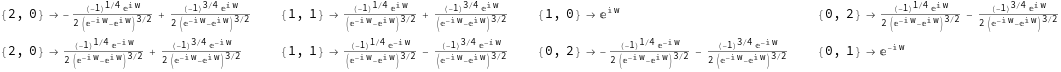

In [66]:
(* For pure analytical computation, it might the better to replace monomial coefficients with symbols *)

CoefficientRules[mapping[za, zb], {za, zb}] // TableForm

1    I      1/4  I w
               (-(-) + -) (-1)    E                  1/4  I w
                  2    2                 (1 + I) (-1)    E
               -----------------------   --------------------
 I w                -I w    I w 3/2         -I w    I w 3/2
E      0          (E     - E   )          (E     - E   )
 
      1   I      1/4  I w
     (- - -) (-1)    E
      2   2
     --------------------
        -I w    I w 3/2
>     (E     - E   )          0   0   0   0   0   0   0   0   0

                   1   I      1/4
                  (- + -) (-1)                          1/4
                   2   2                    (1 - I) (-1)
               ----------------------    ----------------------
        -I w    I w   -I w    I w 3/2     I w   -I w    I w 3/2
0      E       E    (E     - E   )       E    (E     - E   )
 
          1    I      1/4
       (-(-) - -) (-1)
          2    2
     ----------------------
      I w   -I w    I w 3/2
>    E    (E     - E   )      0   0   0   0   0   0   0   0   0
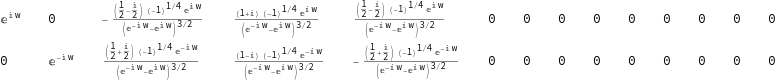

In [68]:
(* To construct the square matrix representation, truncated products for all monomials should be computed *)
(* Optimized product computation can be used, it this case transformations are represented as jets internaly *)
(* Note, ordering corresponds to sm$exponents *)

jet = sm$make$jet[mapping] ;
jet // TableForm

In [73]:
(* Functional form can be computed from jet form *)

sm$make$observable[jet][za, zb] === mapping[za, zb] // StandardForm

RowBox[{"True"}]

In [75]:
(* For high phase space dimension internal jet representation is more efficient *)
(* To use jet form, multiplicaton should be defined after setting global paramters *)

sm$make$mult[] ;

(* This defines sm$mult and sm$mult$compiled function for truncated multiplication of jets *)
(* Note, sm$mult$compiled should be used with pure numerical jets *)
(* Compilation target is "WVM" and should be manualy changed to "C" in the package code *)
(* Compilation to "C" might take some time, the resulting compiled funtion can be saved for later use with LibraryGenerate *)

In [82]:
(* Compute product *)
(* Note, there is no need to trancate in this case *)

(Normal[Times @@ mapping[t*za, t*zb] + O[t]^(sm$degree + 1)] /. t -> 1) - sm$make$observable[sm$mult[sm$make$jet[mapping]]][za, zb] // Simplify // StandardForm

RowBox[{"0"}]

In [85]:
(* Since jet representation of the map might be sparse, futher optimization of multiplication can be performed *)

sm$optimize$mult[mapping] ;

(* This defines sm$mult$optimized function (sm$make$mult[] is assumed to be executed) *)

SQUARE MATRIX ("JET")
Dimension                          :  2
Computation degree                 :  4
Monomial variables                 :  14
Matrix dimensions                  :  14 x 14 = 196
Make jets...
Finished in 0.000503 sec.
Set initial matrix...
Set partitions...
Enter main loop...
Now computing order 2...
Finished in 0.003635 sec.
Now computing order 3...
Finished in 0.005075 sec.
Now computing order 4...
Finished in 0.000168 sec.
Exit main loop...
Finished in 0.023425 sec.
Return square matrix...


I w
E                                    0
 
                                                                                . 
                  I w                                 I w                         za
                 E                         I Sqrt[2] E
     -(-------------------------)         -----------------
                 -I w    I w 3/2            -I w    I w 3/2                       zb
>      Sqrt[2] (E     - E   )             (E     - E   )
                                                                                    2
                                                                                  za
                I w
               E
     -------------------------                                                    za zb
               -I w    I w 3/2
>    Sqrt[2] (E     - E   )               0                                         2
                                                                                  zb

                                                                                    3
                                                                                  za

                                                                                    2
>    0                                    0                                       za  zb
 
                                                                                       2
                                                                                  za zb

                                                                                    3
                                                                                  zb
>    0                                    0
                                                                                    4
                                                                                  za

                                                                                    3
                                                                                  za  zb

>    0                                    0                                         2   2
                                                                                  za  zb

                                                                                       3
                                                                                  za zb

                                                                                    4
>    0                                    0                                       zb





                                      -I w
0                                    E
 


                   I                             Sqrt[2]
     ------------------------------       ----------------------
              I w   -I w    I w 3/2        I w   -I w    I w 3/2
>    Sqrt[2] E    (E     - E   )          E    (E     - E   )
 


                   -I
     ------------------------------
              I w   -I w    I w 3/2
>    Sqrt[2] E    (E     - E   )          0
 





>    0                                    0
 





>    0                                    0
 





>    0                                    0
 





>    0                                    0






0                                    0
 




      (2 I) w
>    E                                    0
 

                                                     (2 I) w
                                            Sqrt[2] E
                                          -(-----------------)
                                              -I w    I w 3/2
>    0                                      (E     - E   )
 

                    (2 I) w                        (2 I) w
     (2 I) Sqrt[2] E                      Sqrt[2] E
     ----------------------               -----------------
         -I w    I w 3/2                    -I w    I w 3/2
>      (E     - E   )                     (E     - E   )
 

                     
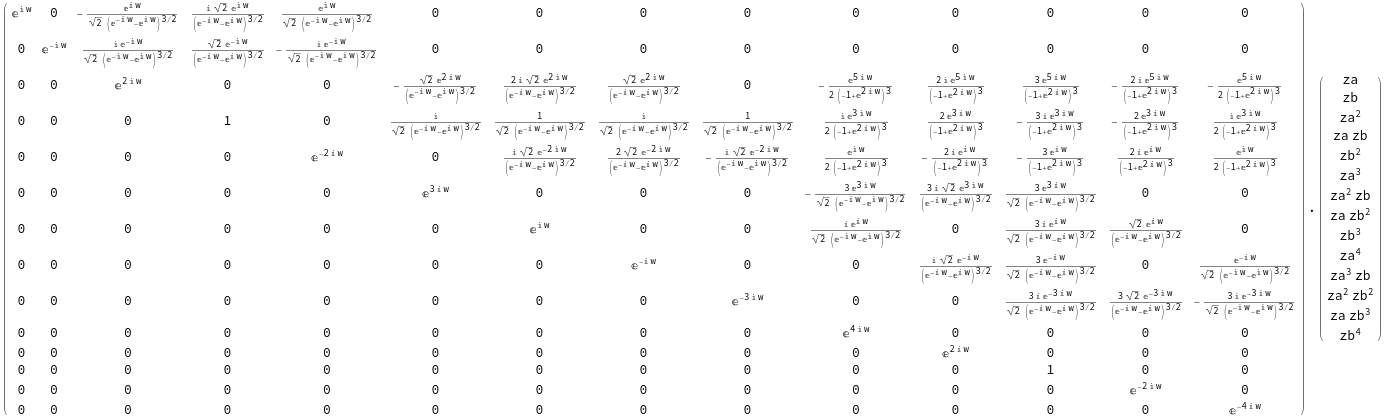

In [88]:
(* sm$make$matrix can be used to construct square matrix representation *)

(* The first agrument should be one of the following: *)
(* "DIRECT"      -- direct computation *)
(* "JET"         -- jet multiplicaton (sm$make$mult[] is assumed to be executed) *)
(* "COMPILED"    -- compiled jet multiplication (sm$make$mult[] is assumed to be executed) *)
(* "OPTIMIZED"   -- opimized jet multiplication (sm$make$mult[] and sm$optimize$mult[] assumed to be executed) *)

(* Use "COMPILED" for pure numerical transformations and "JET" or "OPTIMIZED" in other cases *)

matrix = sm$make$matrix["JET", mapping, "Verbose" -> True] ;
(matrix // Simplify // MatrixForm) . (sm$monomials[za, zb] // MatrixForm)

SQUARE MATRIX ("JET")
Dimension                          :  2
Computation degree                 :  32
Monomial variables                 :  560
Matrix dimensions                  :  560 x 560 = 313600
Make jets...
Finished in 0.002762 sec.
Set initial matrix...
Set partitions...
Enter main loop...
Now computing order 2...
Finished in 0.025788 sec.
Now computing order 3...
Finished in 0.048407 sec.
Now computing order 4...
Finished in 0.068301 sec.
Now computing order 5...
Finished in 0.11741 sec.
Now computing order 6...
Finished in 0.146959 sec.
Now computing order 7...
Finished in 0.232835 sec.
Now computing order 8...
Finished in 0.275719 sec.
Now computing order 9...
Finished in 0.402431 sec.
Now computing order 10...
Finished in 0.450254 sec.
Now computing order 11...
Finished in 0.632328 sec.
Now computing order 12...
Finished in 0.696282 sec.
Now computing order 13...
Finished in 0.936775 sec.
Now computing order 14...
Finished in 1.0015 sec.
Now computing order 15...
Finished 

-Graphics-
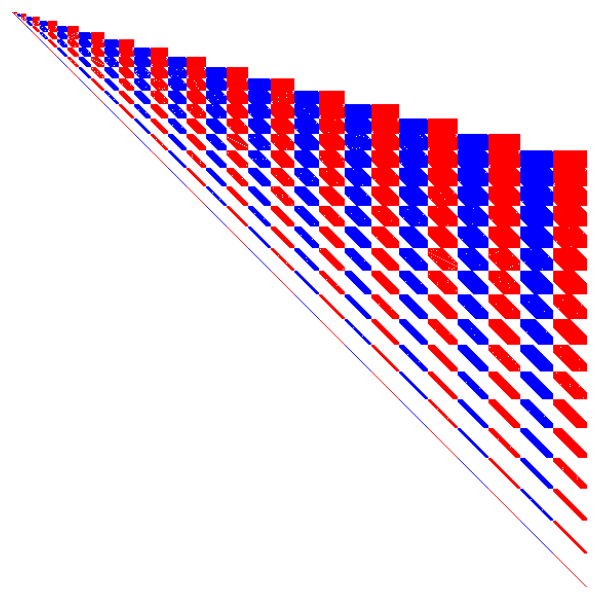

In [97]:
(* Compute with large degree, substitute numerical values and plot square matrix *)
(* Note, color changes between orders *)
(* Multiplication should be recomputed after change in globals *)

dimension = 2  ;
degree    = 32 ;

sm$set$global[dimension, degree, epsilon, accuracy] ;

sm$make$mult[] ;

matrix = sm$make$matrix["JET", mapping, "Verbose" -> True] ;

sm$matrix$plot[N@Normal@matrix /. w -> 2*Pi*0.12345, Frame -> False, ImageSize -> 600, AspectRatio -> 1]